In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import numpy as np

In [3]:
def gen_image(arr):
    two_d = (np.reshape(arr,(28,28))*255).astype(np.uint8)
    plt.imshow(two_d, interpolation ='nearest')
    return plt

In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
# 64 are the number of filters, kernel size is the size of the filters example 3*3 here. 
# activation used is relu.finally shape of the image

In [19]:
model.add(Conv2D(32, kernel_size=3, activation='relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [21]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1) #epochs  = iterations(Nit)

/Users/edwardquarm/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4040 - accuracy: 0.9081
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1467 - accuracy: 0.9568
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1152 - accuracy: 0.9661
Epoch 4/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0955 - accuracy: 0.9725
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0767 - accuracy: 0.9767
Epoch 7/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0688 - accuracy: 0.9790
Epoch 8/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0643 - accuracy: 0.9808
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0598 - accuracy: 0.9823
Epoch 10/10
60000/60000 [==============================

In [23]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 4s 351us/step


In [24]:
print('Testing accuracy - > ',score[1] * 100)


Testing accuracy - >  98.94999861717224


In [25]:
ytested = model.predict_classes(X_test)

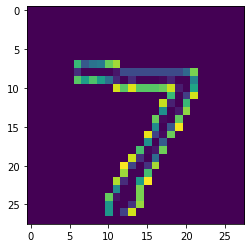

The Predicted Testing image is =7


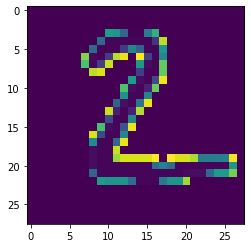

The Predicted Testing image is =2


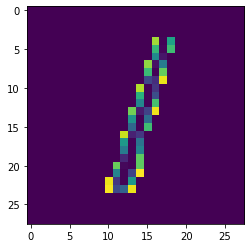

The Predicted Testing image is =1


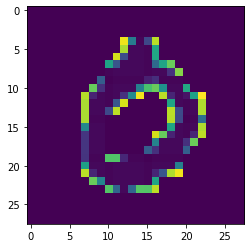

The Predicted Testing image is =0


In [26]:
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (ytested[i]))